In [1]:
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src/data')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src/utils')))

In [3]:
import cv_utils
import data_loader as dload
import data_analysis as da
import file_utils as futils
from config import DRONE_DS_VIDEOS_FOLDER, DATASET_RAW_FOLDER, VIDEO_OUTPUT_FOLDER, ANNOTATIONS_FL_DRONES_DS_FOLDER

## Dataset investigaton NB
### Download dataset of drones, unzip and store locally

In [4]:
dload.download_drones_dataset()

Dataset folder already exists


### Videos stored in 'cvpr15/videos' and annotations stored in 'cvpr15/annotations'

## Split all the given videos by frames

In [2]:
# Execute the function
cv_utils.split_videos_to_frames(DRONE_DS_VIDEOS_FOLDER, DATASET_RAW_FOLDER)

Processing Video_19.avi (150 frames)
Video_19.avi: 150 frames saved.
Processing Video_12.avi (127 frames)
Video_12.avi: 127 frames saved.
Processing Video_56.avi (5000 frames)
Video_56.avi: 5000 frames saved.
Processing Video_29.avi (227 frames)
Video_29.avi: 227 frames saved.
Processing Video_18.avi (153 frames)
Video_18.avi: 153 frames saved.
Processing Video_46.avi (4000 frames)
Video_46.avi: 4000 frames saved.
Processing Video_48.avi (5800 frames)
Video_48.avi: 5800 frames saved.
Processing Video_55.avi (6000 frames)
Video_55.avi: 6000 frames saved.
Processing Video_1.avi (393 frames)
Video_1.avi: 393 frames saved.
Processing Video_37.avi (354 frames)
Video_37.avi: 354 frames saved.
Processing Video_49.avi (5000 frames)
Video_49.avi: 5000 frames saved.
Processing Video_47.avi (5800 frames)
Video_47.avi: 5800 frames saved.
Processing Video_11.avi (144 frames)
Video_11.avi: 144 frames saved.
Skipping non-video file: mat
Processing Video_53.avi (5800 frames)
Video_53.avi: 5800 frames 

## Obtained dataset contains 38948 raw images that could be splitted into train/test dataset

### Save the number of frames for every video into the dictionary

In [5]:
frames_count = da.count_frames_in_dataset(DATASET_RAW_FOLDER)

{'Video_46': 4000, 'Video_49': 5000, 'Video_37': 354, 'Video_19': 150, 'Video_1': 393, 'Video_11': 144, 'Video_56': 5000, 'Video_47': 5800, 'Video_12': 127, 'Video_18': 153, 'Video_53': 5800, 'Video_55': 6000, 'Video_29': 227, 'Video_48': 5800}


## Now download new annotations for this dataset and check them

### Now copy new annotations to the dataset folder

In [7]:
dload.download_fl_drones_annotations()

Cloning into '../../Drone-Detection'...


### Rename annotation filenames for convenience

In [5]:
futils.rename_files_in_folder(ANNOTATIONS_FL_DRONES_DS_FOLDER)

Renamed: Video_019.txt -> Video_19.txt
Renamed: Video_048.txt -> Video_48.txt
Renamed: Video_029.txt -> Video_29.txt
Renamed: Video_056.txt -> Video_56.txt
Renamed: Video_055.txt -> Video_55.txt
Renamed: Video_046.txt -> Video_46.txt
Renamed: Video_012.txt -> Video_12.txt
Renamed: Video_018.txt -> Video_18.txt
Renamed: Video_011.txt -> Video_11.txt
Renamed: Video_049.txt -> Video_49.txt
Renamed: Video_047.txt -> Video_47.txt
Renamed: Video_001.txt -> Video_1.txt
Renamed: Video_037.txt -> Video_37.txt
Renamed: Video_053.txt -> Video_53.txt


### Check that new annotations are correct

In [4]:
# Paths to video and annotation file
video_number = 1

cv_utils.draw_bboxes_on_the_video(video_number, DRONE_DS_VIDEOS_FOLDER, VIDEO_OUTPUT_FOLDER)

Output video saved to: ../results/output/Video_1_inference.mp4


### It seems correct for the first video, let's check other cases: Video_046 contains missing annotations Video_048 has annotations for 2 drones on the same frame

In [10]:
# Paths to video and annotation file
video_number = 46

cv_utils.draw_bboxes_on_the_video(video_number, DRONE_DS_VIDEOS_FOLDER, VIDEO_OUTPUT_FOLDER)

AttributeError: module 'video_processing' has no attribute 'draw_bboxes_on_the_video'

In [60]:
# Paths to video and annotation file
video_number = 48

cv_utils.draw_bboxes_on_the_video(video_number, DRONE_DS_VIDEOS_FOLDER, VIDEO_OUTPUT_FOLDER)

Output video saved to: ../results/output/Video_48_inference.mp4


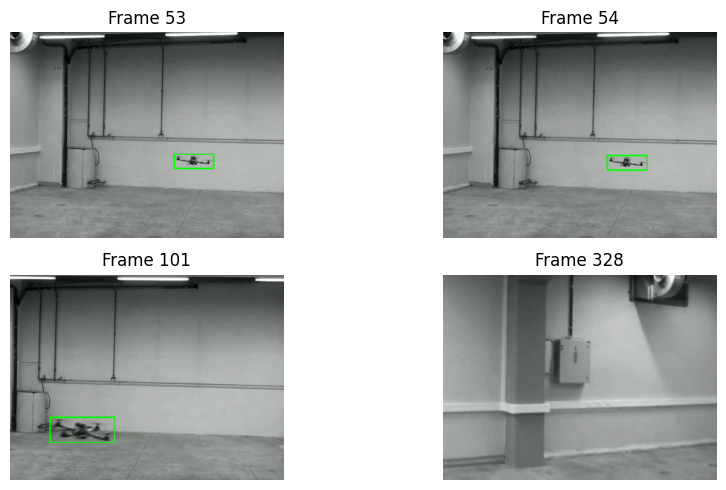

In [64]:
video_number = 1
cv_utils.get_frames_and_show(video_number, VIDEO_OUTPUT_FOLDER, [53, 54, 101, 328])

### Check these frames where 2 drones were detected

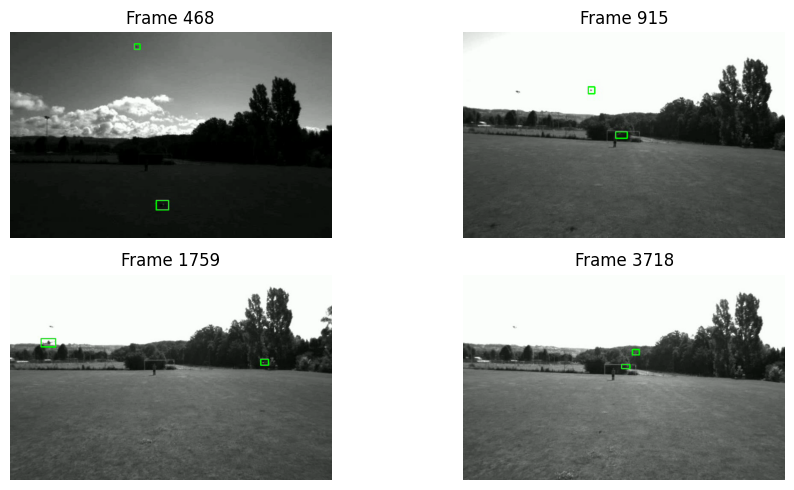

In [65]:
video_number = 48
cv_utils.get_frames_and_show(video_number, VIDEO_OUTPUT_FOLDER, [468, 915, 1759, 3718])

### Now check how much detection we have for our dataset

In [67]:
summary = da.get_detections_summary(ANNOTATIONS_FL_DRONES_DS_FOLDER)
print(summary)

{'Video_56': (2517, 2168), 'Video_12': (127, 127), 'Video_37': (327, 327), 'Video_19': (150, 150), 'Video_48': (4273, 4063), 'Video_29': (227, 227), 'Video_47': (4003, 4003), 'Video_55': (1576, 1576), 'Video_53': (3259, 3259), 'Video_18': (145, 145), 'Video_49': (2949, 2632), 'Video_1': (285, 285), 'Video_46': (914, 914), 'Video_11': (141, 141)}


### Now add frames_count data to the summary and visualize dataset info

In [68]:
# Check that keys are the same in both dicts
set(frames_count.keys()) == set(summary.keys())

True

In [69]:
for key in summary.keys():
    summary[key] = summary[key] + (frames_count[key], )
    print(f"In {key} file: {summary[key]}")

In Video_56 file: (2517, 2168, 5000)
In Video_12 file: (127, 127, 127)
In Video_37 file: (327, 327, 354)
In Video_19 file: (150, 150, 150)
In Video_48 file: (4273, 4063, 5800)
In Video_29 file: (227, 227, 227)
In Video_47 file: (4003, 4003, 5800)
In Video_55 file: (1576, 1576, 6000)
In Video_53 file: (3259, 3259, 5800)
In Video_18 file: (145, 145, 153)
In Video_49 file: (2949, 2632, 5000)
In Video_1 file: (285, 285, 393)
In Video_46 file: (914, 914, 4000)
In Video_11 file: (141, 141, 144)


## Analyzing dataset

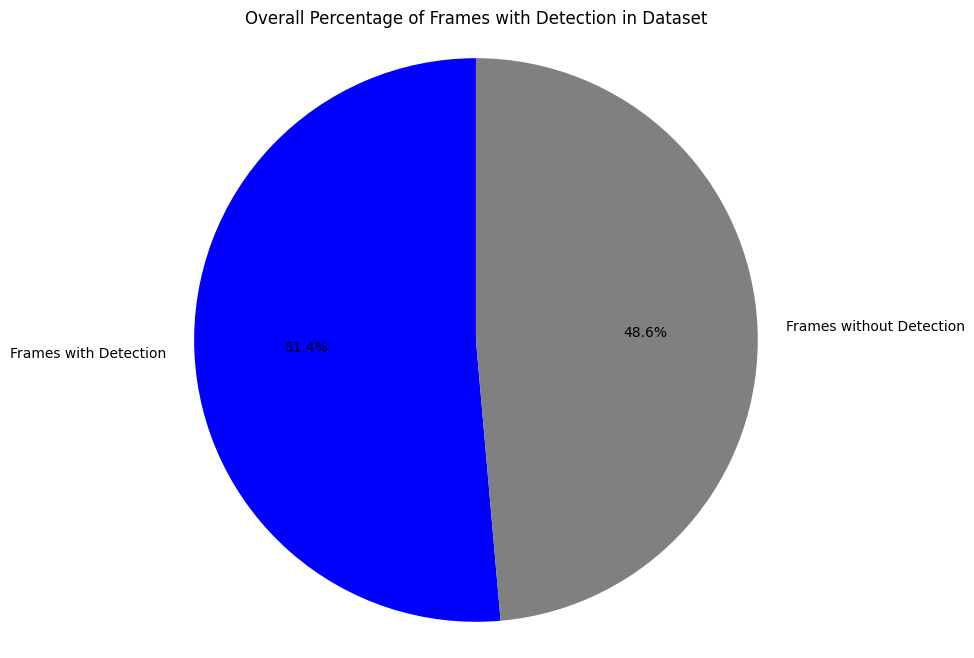

In [71]:
da.plot_overall_percentage_of_frames_with_detection(summary)

### Approximately 50% of images contains no detections

### Stacked Bar Chart: Frame Distribution

#### A stacked bar chart can show the distribution of frames:

    - Frames with detections.
    - Frames without detections

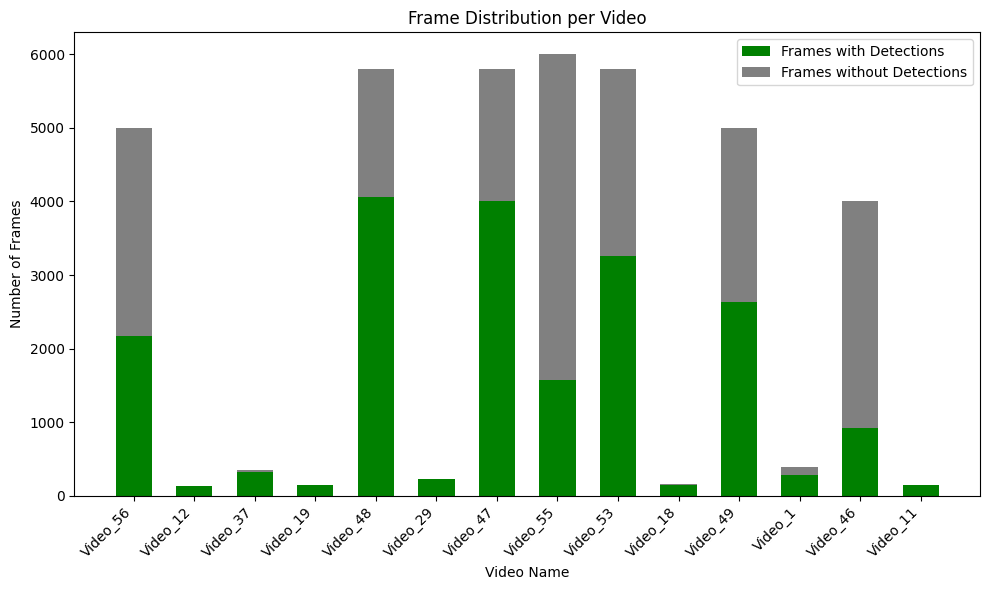

In [36]:
da.plot_frame_distribution(summary)

### Check the density of detections for each video

/tmp/ipykernel_7174/3226947053.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


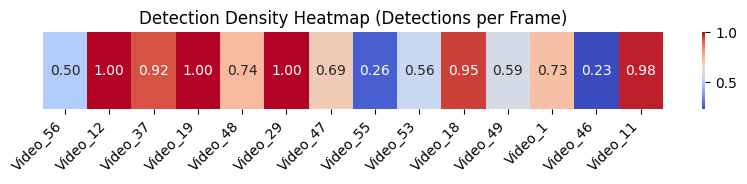

In [34]:
da.plot_detection_density_heatmap(summary)

### We see different density, Video_55 and Video_46 have about 1/4 of frames with detections, while Video_12, Video_19, Video_29 have all frames with drone detected

## Let's check videos size

In [15]:
resolutions = cv_utils.get_video_resolutions(DRONE_DS_VIDEOS_FOLDER)
print(set(resolutions.values()))

{(752, 480), (640, 480)}


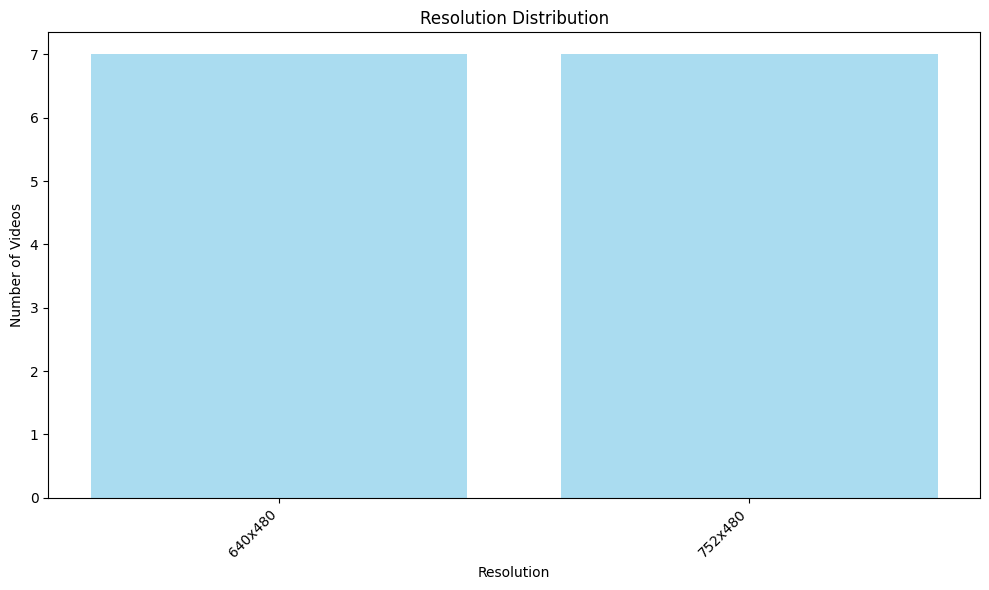

In [29]:
da.draw_resolution_histogram(resolutions)

### 7 videos with 640x480 size and 7 videos has 752x480 resolution

## Now check drones sizes.

In [24]:
drone_areas = cv_utils.read_annotations_and_calculate_areas(ANNOTATIONS_FL_DRONES_DS_FOLDER)

Summary Across All Files:
Minimum: 81.00
Maximum: 53856.00
Mean: 658.57
Median: 276.00


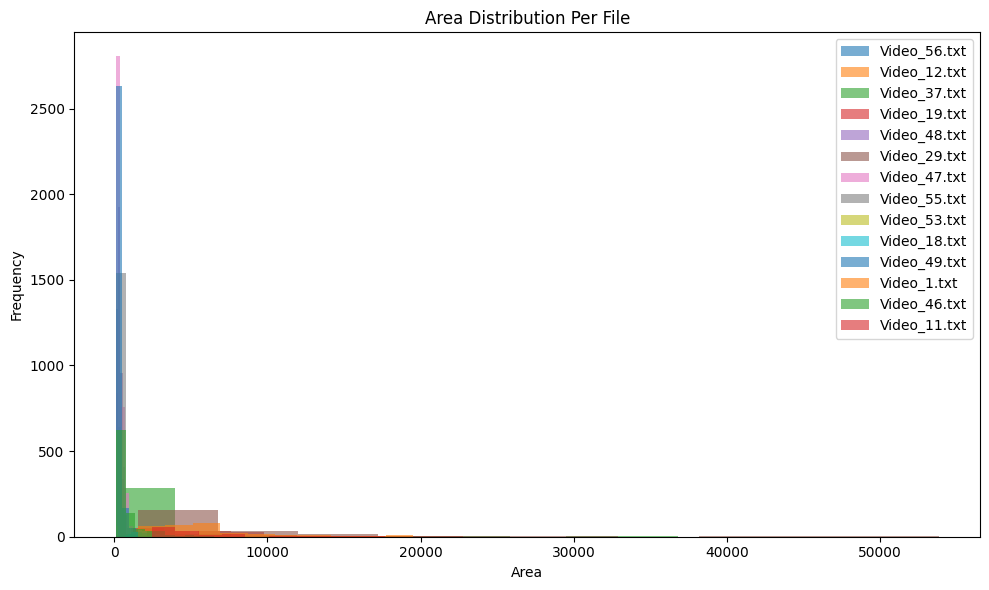

In [31]:
da.visualize_drones_areas(drone_areas)

### Plot image's sizes distribution for our dataset

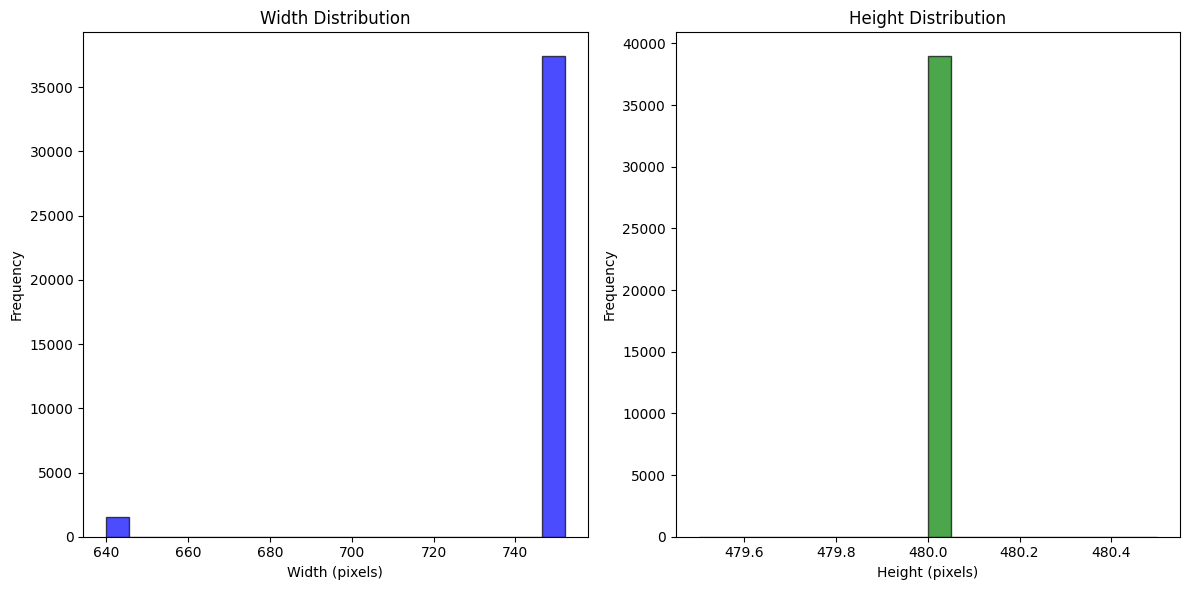

Summary Statistics:
Width - Min: 640, Max: 752
Height - Min: 480, Max: 480


In [7]:
da.analyze_image_sizes(DATASET_RAW_FOLDER)

### Most of the images has size 752x480